In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

places_df = {}
train_data_df = pd.read_csv('Datasets/train.csv')
test_data_df = pd.read_csv('Datasets/test.csv')

In [15]:
all = len(train_data_df)
attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date','monthly_rent']
for attribute in attributes:
    unique = 'unique_' + attribute
    globals()[unique] = len(train_data_df[attribute].unique())
    print(attribute + ': ' + str(globals()[unique]) + '/ '+ str(all))

flat_model: 19/ 60000
floor_area_sqm: 146/ 60000
furnished: 1/ 60000
lease_commence_date: 54/ 60000
monthly_rent: 113/ 60000


In [14]:
all = len(test_data_df)
attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date']
for attribute in attributes:
    unique = 'unique_' + attribute
    globals()[unique] = len(test_data_df[attribute].unique())
    print(attribute + ': ' + str(globals()[unique]) + '/ '+ str(all))

flat_model: 18/ 30000
floor_area_sqm: 145/ 30000
furnished: 1/ 30000
lease_commence_date: 54/ 30000


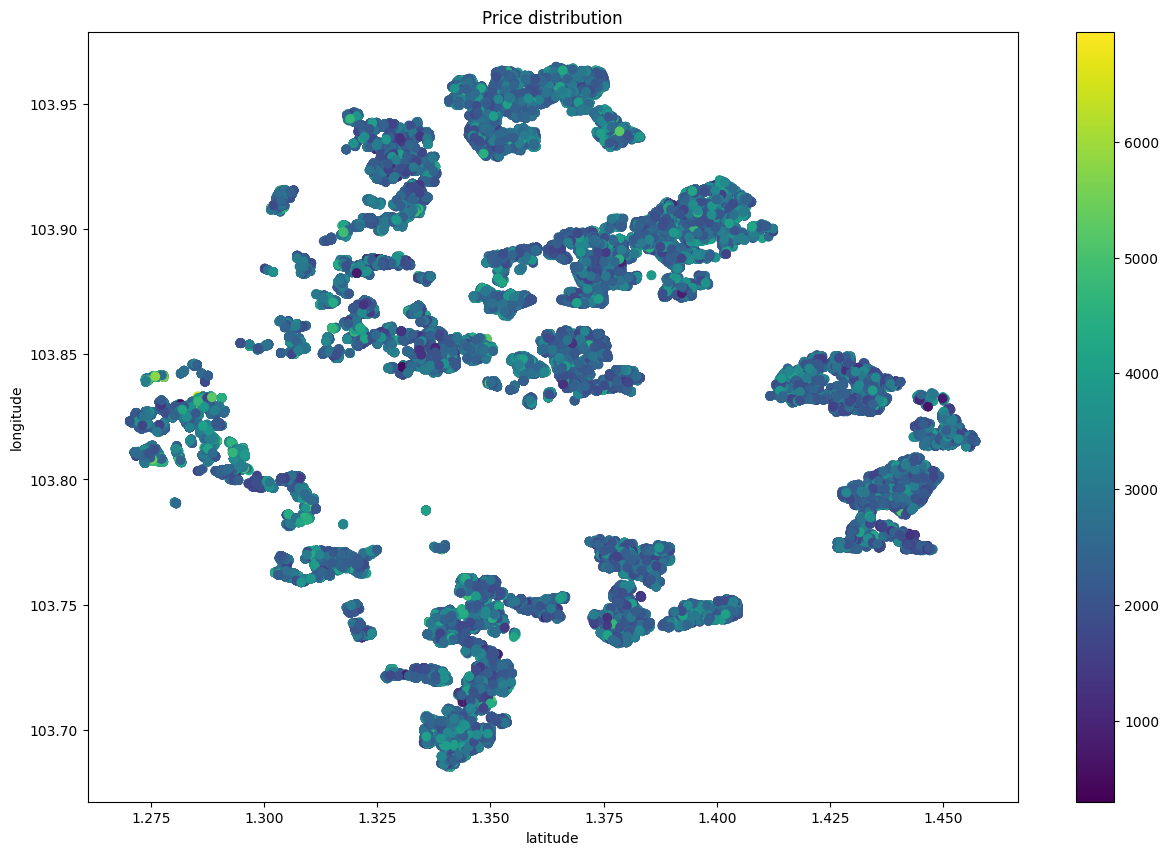

In [7]:
def visual_train_data():
    plt.figure(figsize=(15, 10))
    plt.scatter(train_data_df['latitude'], train_data_df['longitude'], c=train_data_df['monthly_rent'], cmap='viridis')
    plt.colorbar()
    plt.xlabel('latitude')
    plt.ylabel('longitude')
    plt.title('Price distribution')
    plt.savefig('visual_train_data_latlng.png')
    plt.show()

visual_train_data()

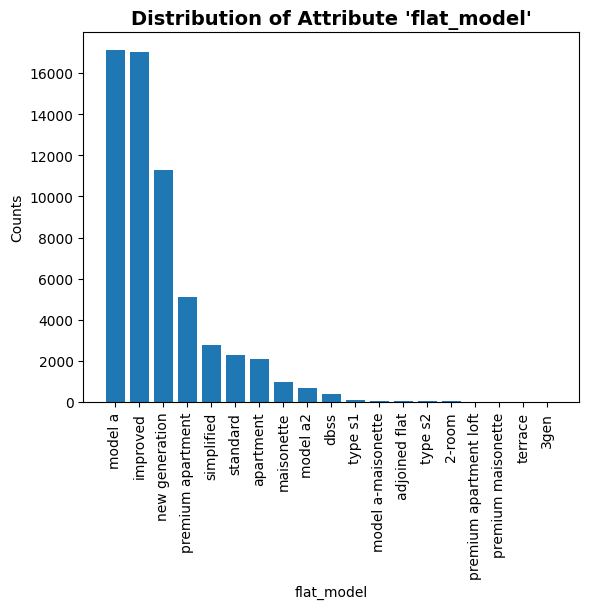

<Figure size 640x480 with 0 Axes>

In [46]:
train_data_df['flat_model'] = train_data_df['flat_model'].str.lower()
counts = train_data_df['flat_model'].value_counts()
counts = counts.reset_index()
counts.columns = ['flat_model', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.flat_model, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('flat_model') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'flat_model\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_flat_model.png')

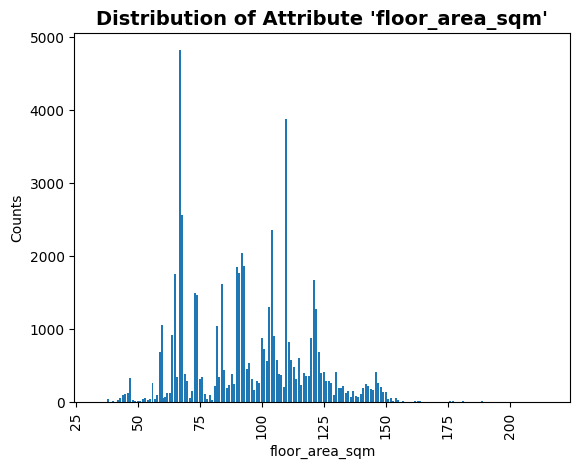

<Figure size 640x480 with 0 Axes>

In [11]:
counts = train_data_df['floor_area_sqm'].value_counts()
counts = counts.reset_index()
counts.columns = ['floor_area_sqm', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.floor_area_sqm, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('floor_area_sqm') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'floor_area_sqm\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_floor_area_sqm.png')

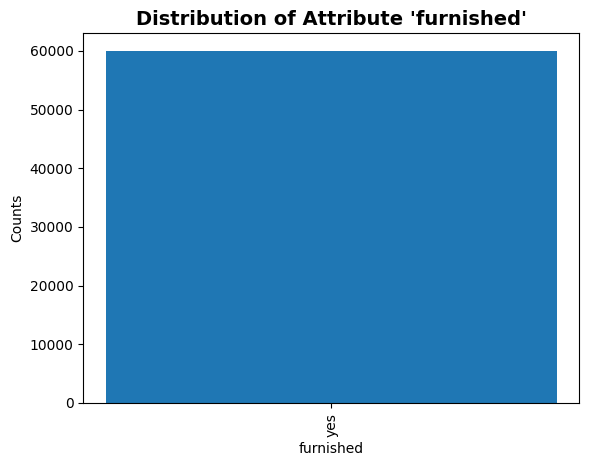

<Figure size 640x480 with 0 Axes>

In [12]:
train_data_df['furnished'] = train_data_df['furnished'].str.lower()
counts = train_data_df['furnished'].value_counts()
counts = counts.reset_index()
counts.columns = ['furnished', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.furnished, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('furnished') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'furnished\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_furnished.png')

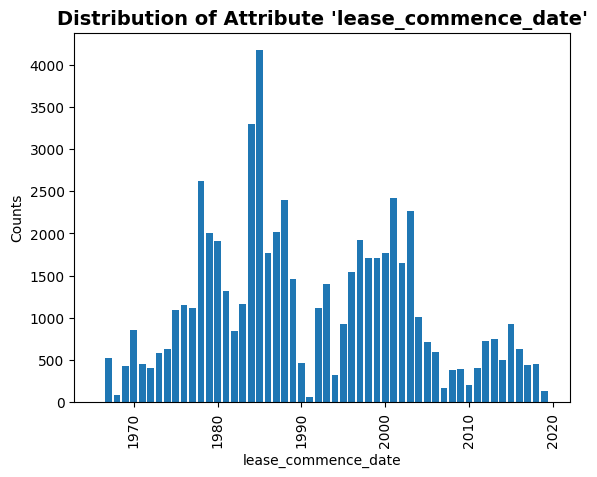

<Figure size 640x480 with 0 Axes>

In [43]:
counts = train_data_df['lease_commence_date'].value_counts()
counts = counts.reset_index()
counts.columns = ['lease_commence_date', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.lease_commence_date, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('lease_commence_date') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'lease_commence_date\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_lease_commence_date.png')

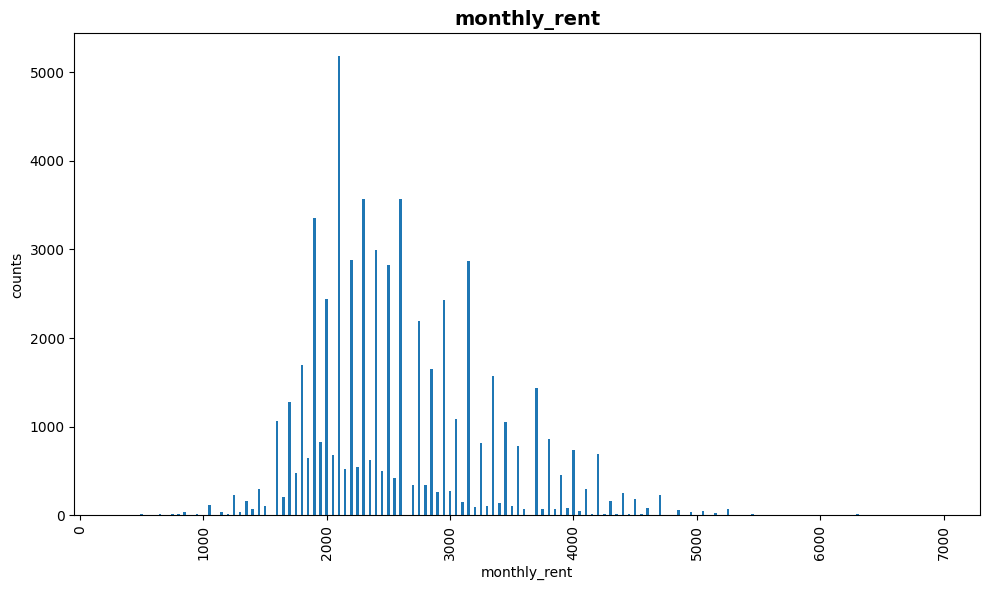

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

unique_values = train_data_df['monthly_rent'].value_counts().reset_index()
unique_values.columns = ['monthly_rent', 'counts']
fig, ax = plt.subplots(figsize=(10, 6))  # 调整图形大小
plt.bar(unique_values.monthly_rent, unique_values.counts, width=20)  # 调整宽度
ax.set_xlabel('monthly_rent')
ax.set_ylabel('counts')
ax.set_title('monthly_rent', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()
plt.savefig('visual_train_monthly_rent.png')


In [50]:
import pandas as pd
missing_values = train_data_df.isnull().sum()
print(missing_values)


rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64


There are 0 numerical features with skewness > 0.5 :



Series([], dtype: float64)

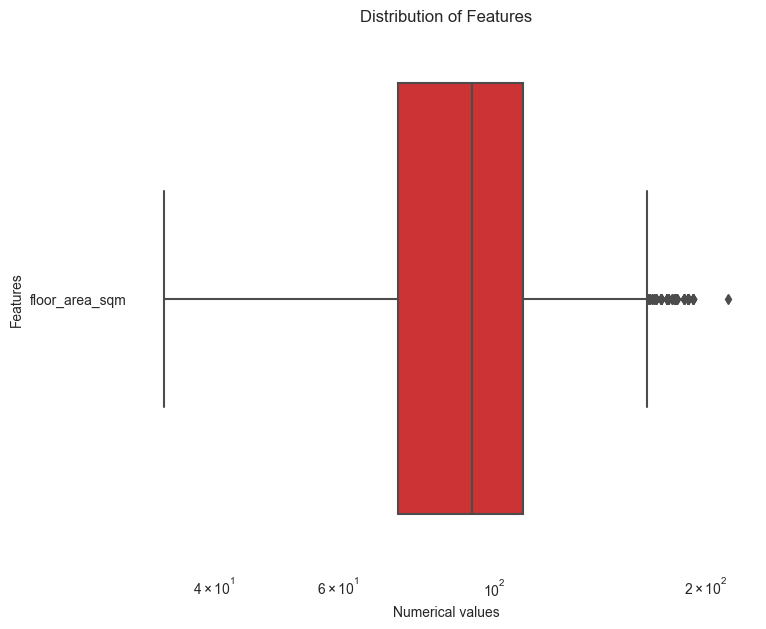

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats

# List all numerical features
numerical_features = ['floor_area_sqm']
# Boxplot to visualize the skewness of the numerical features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=train_data_df[numerical_features] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Features")
ax.set(xlabel="Numerical values")
ax.set(title="Distribution of Features")
sns.despine(trim=True, left=True)
# Check skewness of all features
skewness = train_data_df[numerical_features].apply(lambda x: skew(x))

high_skewed = skewness[abs(skewness) > 0.5]

print("There are {} numerical features with skewness > 0.5 :\n".format(high_skewed.shape[0]))
high_skewed

In [2]:
duplicates = train_data_df[train_data_df.duplicated()]
print('There are {} duplicate records in the dataset'.format(duplicates.shape[0]))

There are 273 duplicate records in the dataset


In [3]:
train_data_df = train_data_df.drop_duplicates(ignore_index=True)
print('After dropping duplicate data, the training dataset now has {} rows'.format(train_data_df.shape[0]))
train_data_df.head()

After dropping duplicate data, the training dataset now has 59727 rows


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


In [4]:
train_data_df = pd.get_dummies(train_data_df, columns=['furnished'])
train_data_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,furnished_yes
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,1
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,1
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,1
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,1
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,1


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data_df['flat_model'] = label_encoder.fit_transform(train_data_df['flat_model'])
train_data_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,furnished_yes
0,2021-09,jurong east,257,Jurong East Street 24,3 room,10,67.0,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,1
1,2022-05,bedok,119,bedok north road,4-room,10,92.0,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,1
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,5,67.0,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,1
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,3,149.0,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,1
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,5,68.0,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,1


In [6]:
train_data_df['lease_commence_date'] = train_data_df['lease_commence_date'].apply(str)
label_encoder = LabelEncoder()
train_data_df['lease_commence_date'] = label_encoder.fit_transform(train_data_df['lease_commence_date'])
train_data_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,furnished_yes
0,2021-09,jurong east,257,Jurong East Street 24,3 room,10,67.0,17,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,1
1,2022-05,bedok,119,bedok north road,4-room,10,92.0,12,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,1
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,5,67.0,5,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,1
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,3,149.0,27,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,1
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,5,68.0,6,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,1


In [10]:
train_data_df.dtypes
train_data_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,furnished_yes
0,2021-09,jurong east,257,Jurong East Street 24,3 room,10,67.0,17,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,1
1,2022-05,bedok,119,bedok north road,4-room,10,92.0,12,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,1
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,5,67.0,5,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,1
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,3,149.0,27,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,1
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,5,68.0,6,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,1


In [11]:
train_data_df.to_csv('processed_data.csv', index=False)